## Sampling in Python

+ population vs. sample
+ working with feather files
  + nice tutorial here: https://www.askpython.com/python-modules/pandas/load-using-read_feather

### Spotify data

In [1]:
import pandas as pd
import numpy as np

spotify_population = pd.read_feather('./data/spotify_2000_2020.feather')
print(spotify_population.columns)
# print(spotify_population.head())

Index(['acousticness', 'artists', 'danceability', 'duration_ms',
       'duration_minutes', 'energy', 'explicit', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'name', 'popularity',
       'release_date', 'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')


In [13]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample.head())

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                                          artists  \
1583         0.2670  ['Aaron Y Su Grupo Ilusion', 'Cristian Castro']   
31775        0.5640                             ['Carrie Underwood']   
24478        0.0291                                  ['Alan Walker']   
19134        0.4470                                     ['Los Mier']   
14462        0.1200                                      ['Cannons']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
1583          0.667     219347.0          3.655783   0.678       0.0   
31775         0.434     240267.0          4.004450   0.608       0.0   
24478         0.589     212627.0          3.543783   0.651       0.0   
19134         0.526     192893.0          3.214883   0.587       0.0   
14462         0.737     231826.0          3.863767   0.678       0.0   

                           id  instrumentalness  key  liveness  loudness  \
1583   4aeteklsGBPXRfZPKN4NS5          0.000544  7.0     0

In [3]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = spotify_population["loudness"].sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.3434599999999985


### Are these finding generalizable?

The left distribution below represents the population. The right distribution is from a sample of unknown origin. Does the sample look like it came from the population on the left?... Unlikely.

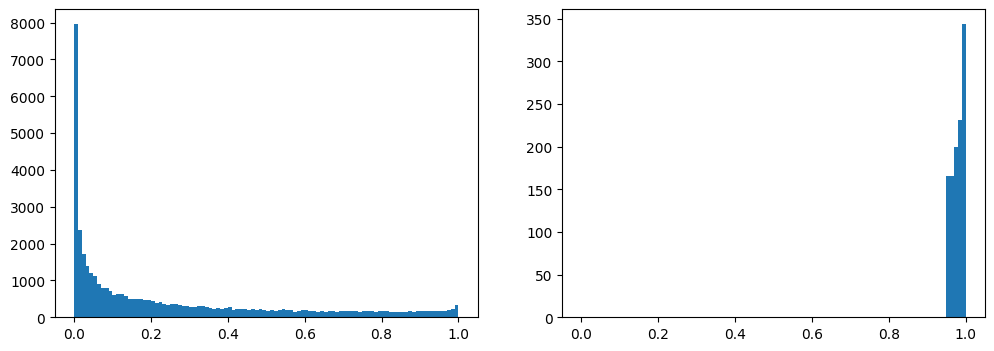

In [16]:
import matplotlib.pyplot as plt

# read in spotify_mysterious_sample
spotify_mysterious_sample = pd.read_csv("./data/spotify_mysterious_sample1.csv")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].hist(spotify_population["acousticness"], bins=np.arange(0, 1.01, 0.01))
ax[1].hist(spotify_mysterious_sample['acousticness'], bins=np.arange(0, 1.01, 0.01))

# Visualize these distributions side-by-side
plt.show()

### How about these two?

The sample of the right looks much more likely to have come from the population on the left.

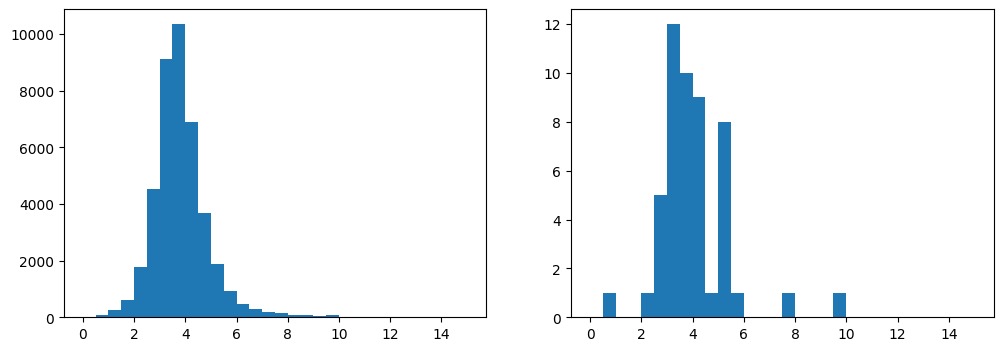

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# read in spotify_mysterious_sample2
spotify_mysterious_sample2 = pd.read_csv("./data/spotify_mysterious_sample2.csv")

ax[0].hist(spotify_population['duration_minutes'], bins=np.arange(0, 15.5, 0.5))
ax[1].hist(spotify_mysterious_sample2['duration_minutes'], bins=np.arange(0, 15.5, 0.5))


# Visualize these distributions side-by-side
plt.show()

## Pseudo-random number generation

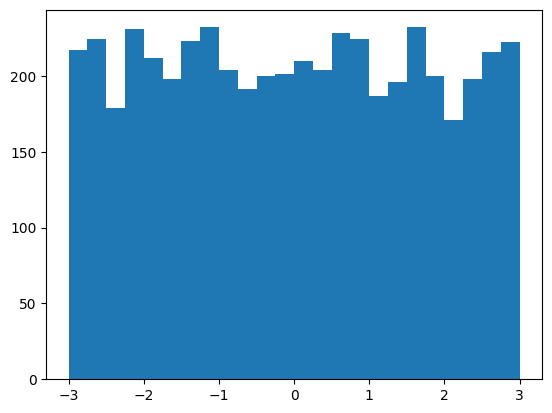

In [8]:
# Generate random numbers from a Uniform(-3, 3)
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

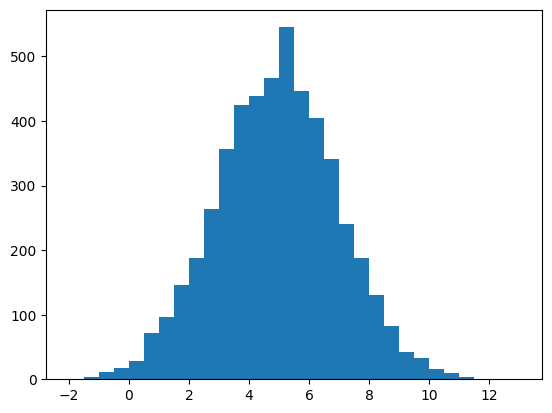

In [9]:
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

In [10]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [11]:
# setting the seed to the same value can be used to ensure reproducibility
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [12]:
# setting the seed to different values will generate different sets of random values
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]
